In [ ]:
### -- this is a simple code to show how to use BertEmbeding and Generative Adversarial Network in a usecase of Text Anomaly detection -- ###

In [ ]:
!pip install transformers
!pip install faker

In [2]:
## There are two lists of normal and abnormal sentences --> you can also use it as csv file
abnormal_sentences = [
    "The quick brown cat jumps sleep in.",
    "Sunshine to my happiness heart brings.",
    "The kids park in are happily running.",
    "The table on is book the.",
    "My delicious is cooking a mother dinner.",
    "Yesterday I to school went.",
    "The across clouds swiftly sky the move.",
    "Makes me happy music.",
    "The artist on canvas painting creates beautifully the.",
    "Is cat the black.",
    "Drinking loves water she.",
    "He well basketball plays.",
    "Running every morning she goes.",
    "The were laughing loudly friends.",
    "Bloomed garden in beautifully the flowers.",
    "Delicious the pizza ate we.",
    "Playing loves he piano the.",
    "Tired after felt work she.",
    "Swimming enjoys he.",
    "Beach on sunny beautiful a had day we the.",
    "Quickly jumps dog brown lazy the.",
    "Quickly sleep in jumps cat the.",
    "Sunshine to my happiness heart brings.",
    "The table on is book the.",
    "My delicious is cooking a mother dinner.",
    "Yesterday I to school went.",
    "The across clouds swiftly sky the move.",
    "Makes me happy music.",
    "The artist on canvas painting creates beautifully the.",
    "Is cat the black.",
    "Drinking loves water she.",
    "He well basketball plays.",
    "Running every morning she goes.",
    "The were laughing loudly friends.",
    "Bloomed garden in beautifully the flowers.",
    "Delicious the pizza ate we.",
    "Playing loves he piano the.",
    "Tired after felt work she.",
    "Swimming enjoys he.",
    "The quick brown cat jumps sleep in.",
    "Playing piano the loves he.",
    "The pizza delicious ate we.",
    "Garden the in beautifully flowers bloomed.",
    "The jumps quickly dog brown.",
    "Drinking loves water she.",
    "Delicious is cooking a mother dinner my.",
    "The table on is book the.",
    "Yesterday I to school went.",
    "Basketball well plays he.",
    "Beach the on day sunny beautiful a had we.",
    "Is cat the black.",
    "Park the in running happily are kids the.",
    "Loudly laughing were friends the.",
    "Every morning goes she running.",
    "Happy me makes music.",
    "The painting on canvas artist the creates beautifully.",
    "Sky the across swiftly move clouds the.",
    "Quickly brown cat the jumps sleep in.",
    "Swimming enjoys he.",
    "Drinking loves water she.",
    "Quickly jumps cat brown the sleep in.",
    "The table on is book the.",
    "Every morning goes she running.",
    "Well basketball plays he.",
    "Swiftly move clouds the across sky the.",
    "Is cat the black.",
    "Delicious is cooking a mother dinner my.",
    "Loudly laughing were friends the.",
    "Delicious the pizza ate we.",
    "Happy me makes music.",
    "The painting on canvas artist the creates beautifully.",
    "Drinking loves water she.",
    "Quickly jumps dog brown the.",
    "Every morning goes she running.",
    "The table on is book the.",
    "Quickly jumps cat the sleep in.",
    "My delicious is cooking a mother dinner.",
    "The across clouds swiftly sky the move.",
    "Makes me happy music.",
    "The painting on canvas artist the creates beautifully.",
    "Is cat the black.",
    "Drinking loves water she.",
    "He well basketball plays.",
    "Running every morning she goes.",
    "The were laughing loudly friends.",
    "Bloomed garden in beautifully the flowers.",
    "Delicious the pizza ate we.",
    "Playing loves he piano the.",
    "Tired after felt work she.",
    "Swimming enjoys he.",
    "Beach on sunny beautiful a had day we the.",
    "Quickly jumps dog brown the.",
    "Quickly jumps cat the sleep in.",
    "Sunshine to my happiness heart brings.",
    "The park in kids are happily running.",
    "The table on is book the.",
    "My delicious is cooking a mother dinner.",
    "Yesterday I to school went.",
    "The across clouds swiftly sky the move."
]

normal_sentences  = [
    "The quick brown cat jumps in sleep.",
    "Sunshine brings happiness to my heart.",
    "The kids are happily running in the park.",
    "The book is on the table.",
    "My mother is cooking a delicious dinner.",
    "I went to school yesterday.",
    "The clouds move swiftly across the sky.",
    "Music makes me happy.",
    "The artist beautifully creates the painting on canvas.",
    "The cat is black.",
    "She loves drinking water.",
    "He plays basketball well.",
    "She goes running every morning.",
    "The friends were laughing loudly.",
    "The flowers bloomed beautifully in the garden.",
    "We ate the delicious pizza.",
    "He loves playing the piano.",
    "She felt tired after work.",
    "He enjoys swimming.",
    "We had a beautiful sunny day on the beach.",
    "The lazy brown dog jumps quickly.",
    "The cat jumps quickly in sleep.",
    "Sunshine brings happiness to my heart.",
    "The kids are happily running in the park.",
    "The book is on the table.",
    "My mother is cooking a delicious dinner.",
    "I went to school yesterday.",
    "The clouds move swiftly across the sky.",
    "Music makes me happy.",
    "The artist beautifully creates the painting on canvas.",
    "The cat is black.",
    "She loves drinking water.",
    "He plays basketball well.",
    "She goes running every morning.",
    "The friends were laughing loudly.",
    "The flowers bloomed beautifully in the garden.",
    "We ate the delicious pizza.",
    "He loves playing the piano.",
    "She felt tired after work.",
    "He enjoys swimming.",
    "The quick brown cat jumps in sleep.",
    "He loves playing the piano.",
    "We ate the delicious pizza.",
    "The flowers bloomed beautifully in the garden.",
    "The brown dog jumps quickly.",
    "She loves drinking water.",
    "My mother is cooking a delicious dinner.",
    "The book is on the table.",
    "I went to school yesterday.",
    "He plays basketball well.",
    "We had a beautiful sunny day on the beach.",
    "The cat is black.",
    "The kids are happily running in the park.",
    "The friends were laughing loudly.",
    "She goes running every morning.",
    "Music makes me happy.",
    "The artist beautifully creates the painting on canvas.",
    "The clouds move swiftly across the sky.",
    "The brown cat jumps quickly in sleep.",
    "He enjoys swimming.",
    "She loves drinking water.",
    "The quick brown cat jumps in sleep.",
    "The book is on the table.",
    "She goes running every morning.",
    "He plays basketball well.",
    "The clouds move swiftly across the sky.",
    "The cat is black.",
    "My mother is cooking a delicious dinner.",
    "The friends were laughing loudly.",
    "We ate the delicious pizza.",
    "Music makes me happy.",
    "The artist beautifully creates the painting on canvas.",
    "She loves drinking water.",
    "The brown dog jumps quickly.",
    "She goes running every morning.",
    "The book is on the table.",
    "The cat jumps quickly in sleep.",
    "My mother is cooking a delicious dinner.",
    "The clouds move swiftly across the sky.",
    "Music makes me happy.",
    "The artist beautifully creates the painting on canvas.",
    "The cat is black.",
    "She loves drinking water.",
    "He plays basketball well.",
    "She goes running every morning.",
    "The friends were laughing loudly.",
    "The flowers bloomed beautifully in the garden.",
    "We ate the delicious pizza.",
    "He loves playing the piano.",
    "She felt tired after work.",
    "He enjoys swimming.",
    "We had a beautiful sunny day on the beach.",
    "The brown dog jumps quickly.",
    "The cat jumps quickly in sleep.",
    "Sunshine brings happiness to my heart.",
    "The kids are happily running in the park.",
    "The book is on the table.",
    "My mother is cooking a delicious dinner.",
    "I went to school yesterday.",
    "The clouds move swiftly across the sky."
]


# To access a specific normal sentence, you can use indexing.
print(normal_sentences[1],abnormal_sentences[1])  # This will print the first normal sentence in the list.

Sunshine brings happiness to my heart. Sunshine to my happiness heart brings.


In [3]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, LeakyReLU, Reshape, Dropout
from tensorflow.keras.models import Sequential


In [4]:
# Sample dataset (normal and anomalous sentences)
#normal_sentences = ["I enjoy reading books.", "The weather is nice today.", "Python is a popular programming language."]
#anomalous_sentences = ["Xyzabc error 404 not found.", "Random text with gibberish.", "This sentence is highly unusual."]

# Concatenate normal and anomalous sentences to create the full dataset
#sentences = normal_sentences + anomalous_sentences

# Labels: 1 for normal sentences, 0 for anomalous sentences
labels = [1] * len(normal_sentences) + [0] * len(abnormal_sentences)


In [5]:
sentences = normal_sentences + abnormal_sentences
len(sentences)

199

In [9]:
# Create labels for normal and abnormal sentences
normal_labels = [1] * len(normal_sentences)
abnormal_labels = [0] * len(abnormal_sentences)

In [10]:
## This is a way to shuffle your data or using same shuffle feature below in train_test_split module
import random
# Combine sentences and labels
sentences = normal_sentences + abnormal_sentences
labels = normal_labels + abnormal_labels

# Combine the sentences and labels into a list of tuples
data = list(zip(sentences, labels))

# Shuffle the combined dataset
random.shuffle(data)

# Unzip the shuffled data into separate sentences and labels lists
shuffled_sentences, shuffled_labels = zip(*data)

In [67]:
# Load BERT tokenizer and tokenize sentences
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='tf')


In [68]:
tokenized_inputs


{'input_ids': <tf.Tensor: shape=(199, 12), dtype=int32, numpy=
array([[  101,  1996,  4248, ...,   102,     0,     0],
       [  101,  9609,  7545, ...,     0,     0,     0],
       [  101,  1996,  4268, ...,  1012,   102,     0],
       ...,
       [  101,  2026, 12090, ...,   102,     0,     0],
       [  101,  7483,  1045, ...,     0,     0,     0],
       [  101,  1996,  2408, ...,   102,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(199, 12), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(199, 12), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]], dtype=int32)>}

In [69]:
# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Get BERT embeddings for the tokenized sentences
bert_outputs = bert_model(tokenized_inputs.input_ids, attention_mask=tokenized_inputs.attention_mask)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_outputs.numpy(), labels, test_size=0.2, random_state=42, shuffle=True)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [70]:
X_train.shape

(159, 12, 768)

In [71]:
from tensorflow.keras.optimizers import Adam
# Define GAN architecture (using BERT embeddings)
input_shape = bert_outputs.shape[1:]
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=input_shape),
    tf.keras.layers.Dense(512, input_shape=input_shape),
    tf.keras.layers.Dense(768, input_shape=input_shape)

    # Add more layers as needed
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(256, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define your custom learning rate
custom_learning_rate = 0.0002  # Example learning rate, adjust as needed

# Compile generator
generator_optimizer = Adam(learning_rate=custom_learning_rate)
generator.compile(loss='binary_crossentropy', optimizer=generator_optimizer)

# Compile discriminator
discriminator_optimizer = Adam(learning_rate=custom_learning_rate)
discriminator.compile(loss='binary_crossentropy', optimizer=discriminator_optimizer, metrics=['accuracy'])

In [72]:

discriminator.trainable = False
gan_input = tf.keras.Input(shape=input_shape)
x = generator(gan_input)
gan_output = discriminator(x)
gan = tf.keras.models.Model(gan_input, gan_output)
#gan.compile(loss='binary_crossentropy', optimizer='adam')


In [73]:
# Define your custom learning rate
custom_learning_rate = 0.0002  # Example learning rate, adjust as needed

# Compile GAN with custom learning rate
gan_optimizer = Adam(learning_rate=custom_learning_rate)
gan.compile(loss='binary_crossentropy', optimizer=gan_optimizer)

In [74]:
input_shape = bert_outputs.shape[1:]

In [75]:
input_shape

TensorShape([12, 768])

In [76]:
gan.summary()
#discriminator.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 768)]         0         
                                                                 
 sequential_6 (Sequential)   (None, 12, 768)           722432    
                                                                 
 sequential_7 (Sequential)   (None, 12, 1)             131713    
                                                                 
Total params: 854,145
Trainable params: 722,432
Non-trainable params: 131,713
_________________________________________________________________


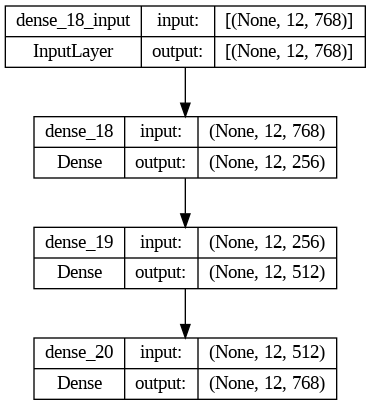

In [77]:
# Visualize the Generator network
tf.keras.utils.plot_model(generator, to_file='generator.png', show_shapes=True, show_layer_names=True)
#tf.keras.utils.plot_model(discriminator, to_file='discriminator.png', show_shapes=True, show_layer_names=True)


In [78]:
# Training the GAN
epochs = 50
batch_size = 64

for epoch in range(epochs):
    for _ in range(0, len(X_train), batch_size):
        indices = np.random.randint(0, len(X_train), batch_size)
        real_embeddings = np.array(X_train)[indices]

        # Generate fake embeddings
        noise = np.random.randint(0, len(X_train), batch_size)
        generated_embeddings = generator.predict(np.array(X_train)[noise])

        # Create labels for real and fake embeddings
        real_labels = np.ones((batch_size, 1))  # Label for real embeddings is 1
        fake_labels = np.zeros((batch_size, 1))  # Label for fake embeddings is 0

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_embeddings, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_embeddings, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator (with inverted labels for tricking the discriminator)
        g_loss = gan.train_on_batch(np.array(X_train)[noise], np.ones((batch_size, 1)))
    print(f'Epoch {epoch}, G Loss: {g_loss}, D Loss: {d_loss[0]}')





2/2 [==============================] - 0s 15ms/step
Epoch 0, G Loss: 0.5702760815620422, D Loss: 0.74770188331604
2/2 [==============================] - 0s 25ms/step
Epoch 1, G Loss: 0.34030842781066895, D Loss: 0.9103656560182571
2/2 [==============================] - 0s 25ms/step
Epoch 2, G Loss: 0.2216305136680603, D Loss: 1.077111855149269
2/2 [==============================] - 0s 26ms/step
Epoch 3, G Loss: 0.17177614569664001, D Loss: 1.2032897174358368
2/2 [==============================] - 0s 23ms/step
Epoch 4, G Loss: 0.18315410614013672, D Loss: 1.1884486675262451
2/2 [==============================] - 0s 15ms/step
Epoch 5, G Loss: 0.2698466181755066, D Loss: 1.041583701968193
2/2 [==============================] - 0s 15ms/step
Epoch 6, G Loss: 0.4372413456439972, D Loss: 0.8506121933460236
2/2 [==============================] - 0s 15ms/step
Epoch 7, G Loss: 0.609192967414856, D Loss: 0.7243491411209106
2/2 [==============================] - 0s 17ms/step
Epoch 8, G Loss: 0.709

In [66]:
# Anomaly detection using the trained discriminator
predictions = discriminator.predict(X_test)
threshold = 0.80 # Adjust the threshold based on your evaluation

# Convert predictions to binary values based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Check if any prediction is greater than or equal to the threshold (1 for anomaly, 0 for normal)
anomalies = binary_predictions.any(axis=1)

# Evaluate the performance
accuracy = np.mean(anomalies == np.array(y_test))
print(f'Accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 9ms/step
Accuracy: 47.50%


In [ ]:
# This is a simple model - you can trian and upgrade your own GAN Model by makeing more optimative one

In [54]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, anomalies)
confusion_mtx

array([[ 0,  8],
       [ 0, 12]])

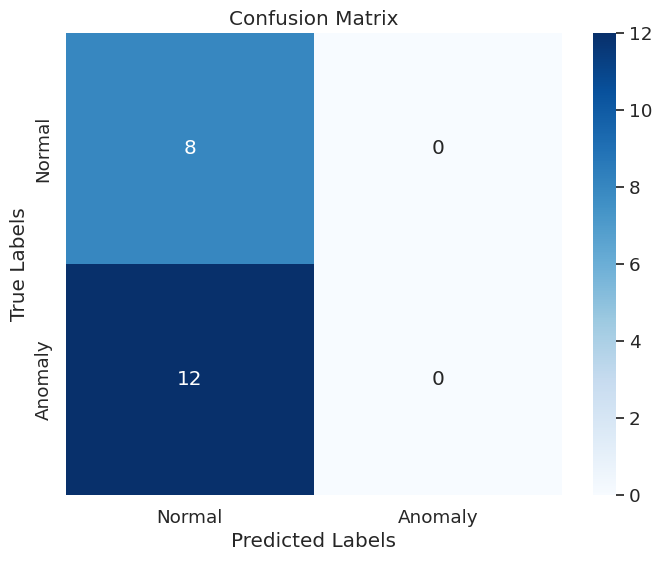

In [29]:
# Plotting the heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if necessary
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()